# 2.1.1 Importing Libraries

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

# 2.1.2 Data Loading

In [76]:
# URL dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Baca dataset dengan pandas
df = pd.read_csv(url, header=None, names=[
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
])

# Tampilkan beberapa baris data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# 2.1.3 Data Description

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [78]:
# Ubah kolom 'ca' dan 'thal' ke tipe numerik
df['ca'] = pd.to_numeric(df['ca'], errors='coerce')
df['thal'] = pd.to_numeric(df['thal'], errors='coerce')

In [79]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# 2.1.4 Data Missing

In [80]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [81]:
# Imputasi data yang hilang dengan nilai rata-rata
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Tampilkan data yang telah diimputasi
df_imputed.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


# 2.1.5 Data Cleaning 

In [82]:
# Penskalaan Fitur (Standarisasi)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

# Tampilkan data yang telah dibersihkan
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.723095,0.655818,-0.764198
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.503851,-0.898522,0.866450
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.428203,1.173931,0.051126
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.723095,-0.898522,-0.764198
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.723095,-0.898522,-0.764198


# 2.1.6 Data Sampling

In [83]:
# Pisahkan data menjadi fitur (X) dan target (y)
X = df.drop('target', axis=1)
y = df['target']

# Lakukan pemisahan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Hitung ukuran data
train_size = X_train.shape[0]
test_size = X_test.shape[0]
total_size = df.shape[0]

In [84]:
# Tampilkan ukuran dan persentase data latih dan data uji
print(f"Ukuran data latih: {X_train.shape}, {y_train.shape} ({train_size / total_size:.2%})")
print(f"Ukuran data uji: {X_test.shape}, {y_test.shape} ({test_size / total_size:.2%})")

Ukuran data latih: (242, 13), (242,) (79.87%)
Ukuran data uji: (61, 13), (61,) (20.13%)


# 2.1.7 Data Transformation

In [85]:
# Buat objek LabelEncoder untuk setiap fitur kategorikal
label_encoders = {col: LabelEncoder() for col in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']}

# Transformasi data kategorikal menggunakan LabelEncoder
X_train_categorical = X_train[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].copy()
X_test_categorical = X_test[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].copy()

for col, encoder in label_encoders.items():
    X_train_categorical[col] = encoder.fit_transform(X_train_categorical[col])
    X_test_categorical[col] = encoder.transform(X_test_categorical[col])

# Transformasi data numerik menggunakan StandardScaler
numeric_columns = X_train.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis=1).columns
X_train_numeric = scaler.fit_transform(X_train.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis=1))
X_test_numeric = scaler.transform(X_test.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis=1))

# Beri nama kolom pada data numerik yang telah distandardisasi
X_train_numeric_df = pd.DataFrame(X_train_numeric, columns=numeric_columns, index=X_train.index)
X_test_numeric_df = pd.DataFrame(X_test_numeric, columns=numeric_columns, index=X_test.index)

# Gabungkan data yang telah ditransformasikan
X_train_transformed = pd.concat([X_train_numeric_df, X_train_categorical.reset_index(drop=True)], axis=1)
X_test_transformed = pd.concat([X_test_numeric_df, X_test_categorical.reset_index(drop=True)], axis=1)


In [86]:
# Menampilkan data latih yang sudah ditransformasikan
print("Data Latih:")
X_train_transformed.head()

Data Latih:


,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
132,-2.838504,-0.125982,-0.864142,2.314470,-0.873573,1.0,3.0,0.0,2.0,1.0,1.0,0.0,2.0
202,0.241352,0.974653,-2.483637,1.021242,-0.704854,1.0,3.0,0.0,2.0,0.0,0.0,1.0,0.0
196,1.561291,1.524970,-0.241260,-0.851710,-0.789214,1.0,3.0,0.0,2.0,1.0,1.0,3.0,0.0
75,1.121311,1.524970,2.374848,0.040172,-0.198698,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0
176,-0.308622,-1.336680,-0.262023,-0.138205,-0.789214,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0


In [87]:
print("\nData Uji Tertransformasi:\n")
X_test_transformed.head()


Data Uji Tertransformasi:



,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal
179,-0.198627,-0.125982,0.007893,1.021242,-0.873573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,-0.088632,-1.226617,-0.822617,-1.877375,-0.873573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,0.131357,-0.401140,0.070182,-0.271987,0.138740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,0.351347,-1.776934,-0.241260,0.263142,-0.789214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,-0.418617,-0.125982,1.232896,-0.361175,0.138740,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0


# 2.1.8 Data Visualisation

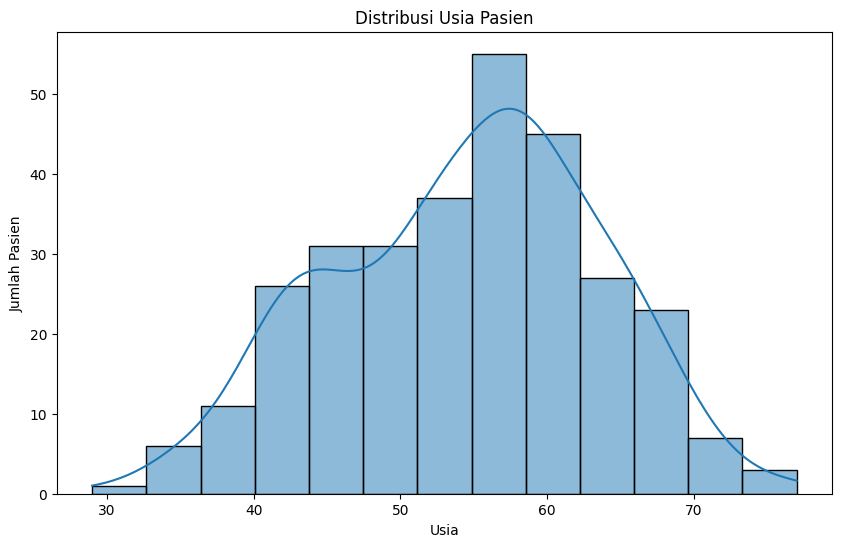

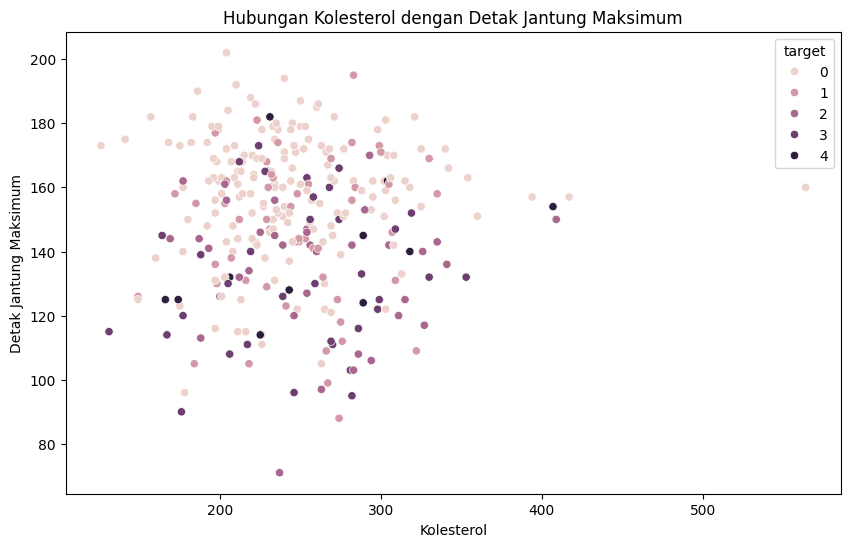

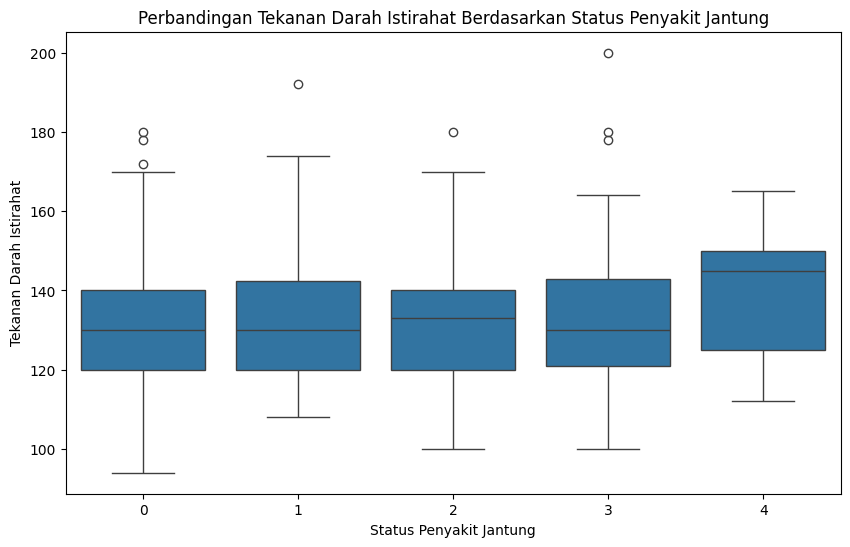

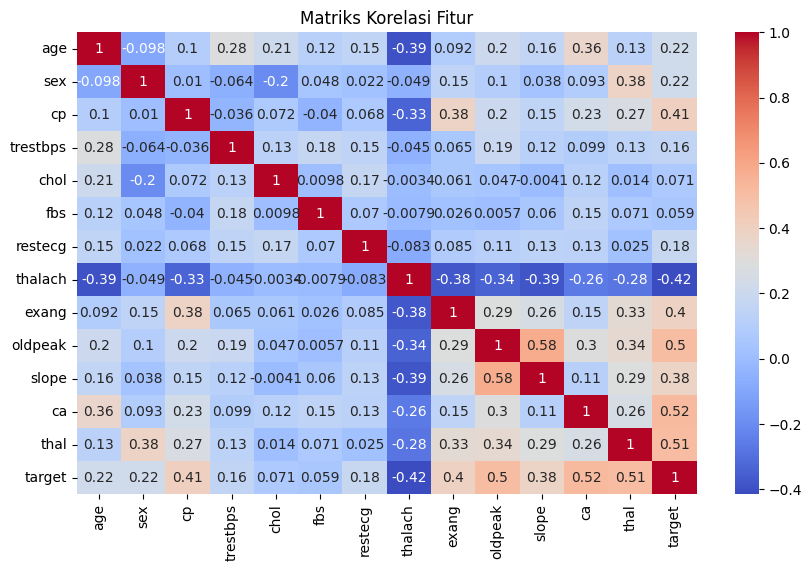

In [88]:
# Visualisasi Data
# 1. Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title("Distribusi Usia Pasien")
plt.xlabel("Usia")
plt.ylabel("Jumlah Pasien")
plt.show()

# 2. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='thalach', data=df, hue='target')
plt.title("Hubungan Kolesterol dengan Detak Jantung Maksimum")
plt.xlabel("Kolesterol")
plt.ylabel("Detak Jantung Maksimum")
plt.show()

# 3. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='trestbps', data=df)
plt.title("Perbandingan Tekanan Darah Istirahat Berdasarkan Status Penyakit Jantung")
plt.xlabel("Status Penyakit Jantung")
plt.ylabel("Tekanan Darah Istirahat")
plt.show()

# 4. Heatmap Korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriks Korelasi Fitur")
plt.show()